## `Jai Chaudhry` `2K18/SE/069` `ML-LAB-C2-G2` 

## Experiment - 2
- Perform Data Preprocessing like outlier detection, handling missing value, analyzing redundancy and normalization on different datasets.


In [204]:
import numpy as np
import pandas as pd
import copy

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [15]:
# data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=',')

# Loading Adult Dataset

In [232]:
# D:\Downloads\adults.csv
data=pd.read_csv('C:\\Users\\Jai\\Desktop\\adult.csv')
idata=copy.deepcopy(data)

In [46]:
print("Dataset Length:",len(data))

Dataset Length: 48842


In [47]:
print("Dataset shapes:",data.shape)

Dataset shapes: (48842, 15)


In [233]:
print("Dataset::")
data.head()

Dataset::


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Dataset Exploration 

In [79]:
print("ATTRIBUTES:\n")

print(data.info())

ATTRIBUTES:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [87]:
fields=[]
print("Fields:\n")
j=0

for i in data.keys():
    j+=1
    fields.append(i)
    print(j,i)

Fields:

1 age
2 workclass
3 fnlwgt
4 education
5 educational-num
6 marital-status
7 occupation
8 relationship
9 race
10 gender
11 capital-gain
12 capital-loss
13 hours-per-week
14 native-country
15 income


In [70]:
# data.describe(include=["all"])
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [130]:
# In [66]: cols = df.columns

# In [67]: num_cols = df._get_numeric_data().columns

# In [68]: num_cols
# Out[68]: Index([u'0', u'1', u'2'], dtype='object')

# In [69]: list(set(cols) - set(num_cols))
# Out[69]: ['3', '4']

# assert list == __builtins__.list
cols=data.columns
num_cols=list(data._get_numeric_data().columns)   # Numeric Columns
print("Numeric Cols\n",num_cols,"\n")

cat_cols = list(set(cols) - set(num_cols))        # Categorical Columns
print("Categorical Cols\n",cat_cols)

Numeric Cols
 ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] 

Categorical Cols
 ['native-country', 'gender', 'workclass', 'education', 'race', 'marital-status', 'income', 'relationship', 'occupation']


`Data Contains 9 Categorical Columns and 6 Numeric Columns`

In [86]:
# frequency for categorical fields 

category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'gender', 'native-country', 'income'] 

print("Frequency for categorical Fields:\n")
for c in category_col:
    print (c)
    print (data[c].value_counts())
    print("\n")

Frequency for categorical Fields:

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated      

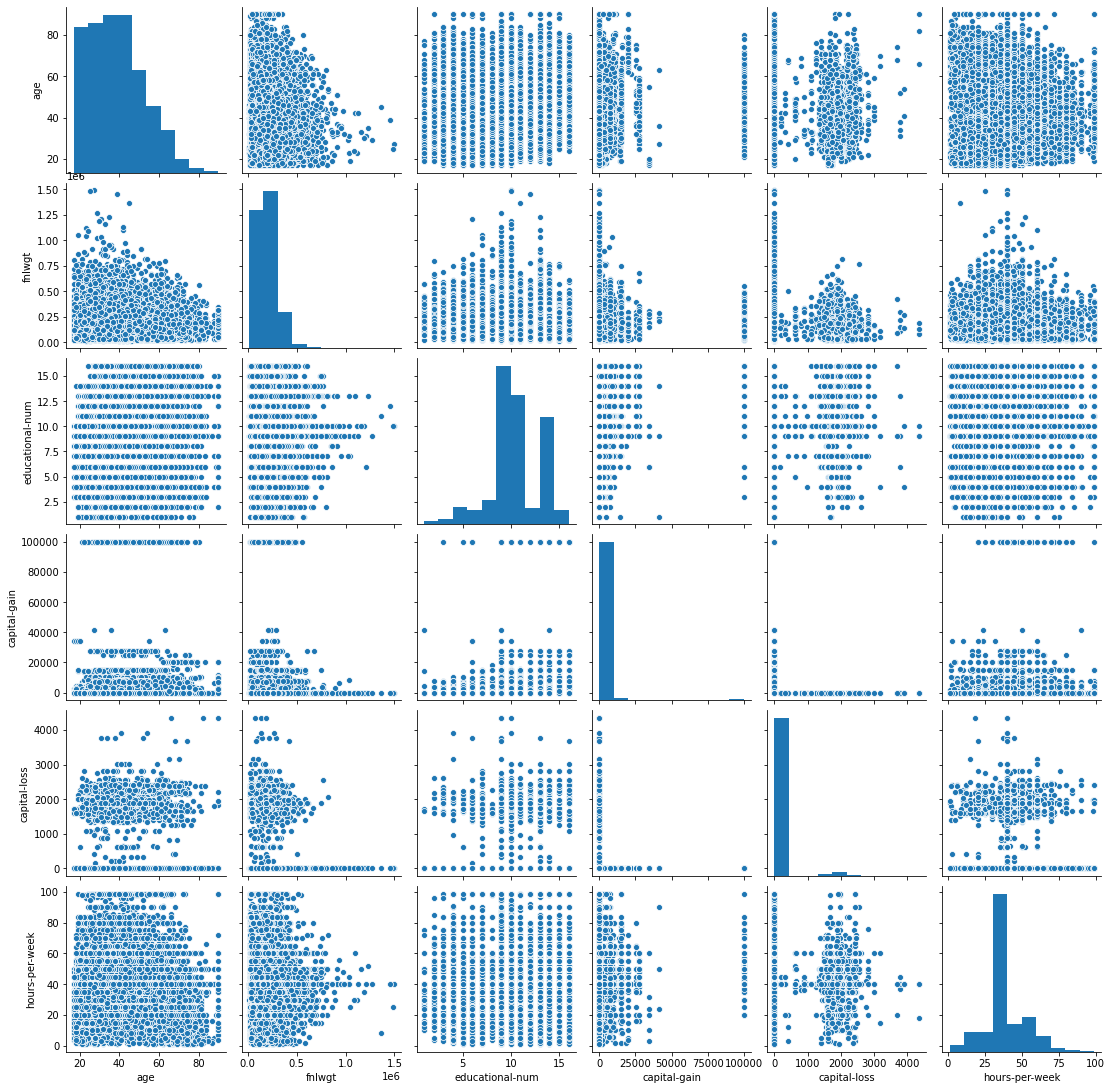

In [84]:
# Plot of Numerical Attributes VS Other Numerical Attributes
sns.pairplot(data)

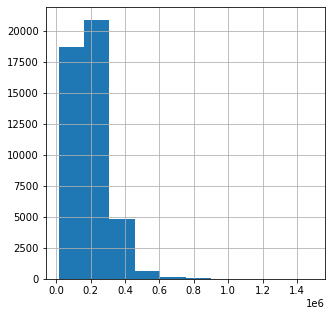

In [259]:
data['fnlwgt'].hist(figsize = (5,5))
plt.show()

In [114]:
# All Fields Values:
for i in fields:
    print(i)
    print(data[i].unique())
    print("\n")

age
[25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]


workclass
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


fnlwgt
[226802  89814 336951 ... 199655 255835 257302]


education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']


educational-num
[ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]


marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'H

# Data Processing
- Outlier Detection
- Normalization
- Handling Missing Values
- Analyzing Redundancy

# Handling Missing Values

`Replacing by Mean`<br>
But Categorical columns wont be replaced so gotta remove whole tuple where categorical column value is missing

In [248]:
# Replacing Missing Values '?' By NaN
data=copy.deepcopy(idata)

for col in data.columns:
    data.loc[data[col]=='?',col] = np.nan
# print(data.head())



# Replacing by mean 
# Create two DataFrames, one for each data type
data_numeric = data[num_cols]
data_categorical = pd.DataFrame(data[cat_cols])

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) # only apply imputer to numeric columns

# you could do something like one-hot-encoding of data_categorical here
#join the two masked dataframes back together
data_joined = pd.concat([data_numeric, data_categorical], axis = 1)

data_joined.head()

c:\users\jai\appdata\local\programs\python\python37\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,native-country,gender,workclass,education,race,marital-status,income,relationship,occupation
0,25.0,226802.0,7.0,0.0,0.0,40.0,United-States,Male,Private,11th,Black,Never-married,<=50K,Own-child,Machine-op-inspct
1,38.0,89814.0,9.0,0.0,0.0,50.0,United-States,Male,Private,HS-grad,White,Married-civ-spouse,<=50K,Husband,Farming-fishing
2,28.0,336951.0,12.0,0.0,0.0,40.0,United-States,Male,Local-gov,Assoc-acdm,White,Married-civ-spouse,>50K,Husband,Protective-serv
3,44.0,160323.0,10.0,7688.0,0.0,40.0,United-States,Male,Private,Some-college,Black,Married-civ-spouse,>50K,Husband,Machine-op-inspct
4,18.0,103497.0,10.0,0.0,0.0,30.0,United-States,Female,NaN,Some-college,White,Never-married,<=50K,Own-child,NaN


`Removing missing data tuples`

In [258]:
# HANDLING MISSING VALUES
# Missing Value Tuples Removed

# Replacing Missing Values '?' By NaN
data=copy.deepcopy(idata)

# for col in data.columns:
#     data.loc[data[col]=='?',col] = np.nan
# print(data.head())



# data = copy.deepcopy(idata)
col_names = data.columns
num_data = data.shape[0]

for c in col_names:
    num_non = data[c].isin(['?']).sum()
    num_non == float(num_non)
    if num_non>0:
        print(c)
        print(num_non)
        print( "{0:.2f}%".format( (num_non/num_data)*100) )
        print()
        

# We can Drop these Fields since their count is less and its better to analyse
# That data which is complete

print("Initial Length of Data :",len(data))


# Nan doesnt get hit since it np.nan==np.nan is false so cant use nan for removal of tuples
# data=data[data["workclass"]!=str(np.nan)]
# data=data[data["occupation"]!=np.nan]
# data=data[data["native-country"]!=np.nan]

data=data[data["workclass"]!='?']
data=data[data["occupation"]!='?']
data=data[data["native-country"]!='?']

print("Final Length of Data   :",len(data))

print(np.nan==np.nan)
print(str(np.nan)==str(np.nan))

workclass
2799
5.73%

occupation
2809
5.75%

native-country
857
1.75%

Initial Length of Data : 48842
Final Length of Data   : 45222
False
True


# Outlier Detection and Removal
### Most common causes of outliers on a data set:
- Data entry errors (human errors)
- Measurement errors (instrument errors)
- Experimental errors (data extraction or experiment planning/executing errors)
- Intentional (dummy outliers made to test detection methods)
- Data processing errors (data manipulation or data set unintended mutations)
- Sampling errors (extracting or mixing data from wrong or various sources)
- Natural (not an error, novelties in data)

`Z-Score`
- The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution. 
- 1 Standard Deviation from the Mean: 68%
- 2 Standard Deviations from the Mean: 95%
- 3 Standard Deviations from the Mean: 99.7%
- A value that falls outside of 3 standard deviations is part of the   distribution, but it is an unlikely or rare event 

`Quantile`
- Flooring and Capping is done below 10% and above 90% of value respectively

`Replacing Outliers with Median Values`
- (Simple) No Explanation

In [263]:
# OutLier Detection: (FOR NUMERIC VALUED ATTRIBUTES / FIELDS)
# Using Z-Score

data=copy.deepcopy(idata)

num_train = data.select_dtypes(include=["number"])
cat_train = data.select_dtypes(exclude=["number"])

# get all those indexes of tuples where zscore < 3
idx = np.all(stats.zscore(num_train) < 3, axis=1)

data_cleaned = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)
print(len(data_cleaned))
data_cleaned.head()

45140


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,89814,9,0,0,50,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,336951,12,0,0,40,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,160323,10,7688,0,40,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,18,103497,10,0,0,30,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


`Quantile`<br>
The cumulative density function gives you the probability of a random variable being on or below a certain value.

The quantile function is the opposite of that. i.e. you give it a probability and it tells you the random variable value.

So the median is the value of the quantile at the probability value of 0.5.

The quantile of a value is the fraction of observations or population less than or equal to the value. The quantile of the median is 0.5, by definition. People often are interested in the 0.25 quantile (also known as the 25 percentile, percentiles are just quantiles multiplied by 100) and the 0.75, these are known as quartiles


In [267]:
# Quantile

data=copy.deepcopy(idata)

num_train = data.select_dtypes(include=["number"])
cat_train = data.select_dtypes(exclude=["number"])

Q1 = num_train.quantile(0.02)
Q3 = num_train.quantile(0.98)

IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
train_cleaned = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

print(len(data))
print(len(train_cleaned))

train_cleaned.head()

48842
48582


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,25,226802,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,89814,9,0,0,50,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,336951,12,0,0,40,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,160323,10,7688,0,40,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,18,103497,10,0,0,30,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


# Normalization of Numeric Data

In [175]:
# Normalization: Using Custom Built Function -> Sigmoid

data=copy.deepcopy(idata)
for column in [c for c in data.columns if np.issubdtype(data[c].dtype , np.number)]:
    data[column] = 1/(1 + np.exp(-data[column]))

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.628869,Private,0.630932,11th,0.645356,Never-married,Machine-op-inspct,Own-child,Black,Male,0.622459,0.622459,0.645244,United-States,<=50K
1,0.639092,Private,0.625535,HS-grad,0.652548,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.622459,0.622459,0.650778,United-States,<=50K
2,0.631254,Local-gov,0.635224,Assoc-acdm,0.662742,Married-civ-spouse,Protective-serv,Husband,White,Male,0.622459,0.622459,0.645244,United-States,>50K
3,0.643692,Private,0.628320,Some-college,0.656031,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.626963,0.622459,0.645244,United-States,>50K
4,0.623264,?,0.626077,Some-college,0.656031,Never-married,?,Own-child,White,Female,0.622459,0.622459,0.639558,United-States,<=50K


In [167]:
# Normalization: Using Inbuilt Function

from sklearn.preprocessing import MinMaxScaler

data=copy.deepcopy(idata)

scaler = MinMaxScaler(feature_range=(0, 1))
print(num_cols,"\n")

log_transformation = pd.DataFrame(data)
log_transformation[num_cols] = scaler.fit_transform(data[num_cols])
display(log_transformation.head(n=5))


# Or Alternatively something like this
# norm = MinMaxScaler().fit(X_train)
# # transform training data
# X_train_norm = norm.transform(X_train)
# # transform testing dataabs
# X_test_norm = norm.transform(X_test)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week'] 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,Private,0.145129,11th,0.400000,Never-married,Machine-op-inspct,Own-child,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
1,0.287671,Private,0.052451,HS-grad,0.533333,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K
2,0.150685,Local-gov,0.219649,Assoc-acdm,0.733333,Married-civ-spouse,Protective-serv,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
3,0.369863,Private,0.100153,Some-college,0.600000,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.076881,0.0,0.397959,United-States,>50K
4,0.013699,?,0.061708,Some-college,0.600000,Never-married,?,Own-child,White,Female,0.000000,0.0,0.295918,United-States,<=50K


## `Jai Chaudhry` `2K18/SE/069` `ML-LAB-C2-G2` 